<a href="https://colab.research.google.com/github/Nanashi-bot/cdiff_changed/blob/main/amazon_convert_and_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import pickle
import torch

# TAKING TAOBAO DATA
with open('/content/train.pkl', 'rb') as f:
    train_data = pickle.load(f)

In [45]:
print(len(train_data['train']))

1300


In [46]:
new_train_data = {'sequences': [{} for _ in range(1300)]}
new_train_data['num_marks'] = train_data['dim_process']

In [47]:
m = 100
ma = 0
for i in range(1300):
  m = min(m,len(train_data['train'][i]))
  ma = max(ma,len(train_data['train'][i]))
# print(ma)
print(train_data['train'][20][:5])

[{'type_event': 0, 'time_since_last_event': 0, 'time_since_start': 151157.1451}, {'type_event': 1, 'time_since_last_event': 0.010999999998603, 'time_since_start': 151157.1561}, {'type_event': 16, 'time_since_last_event': 0.4214000000210944, 'time_since_start': 151157.5775}, {'type_event': 16, 'time_since_last_event': 0.0012999999744351, 'time_since_start': 151157.5788}, {'type_event': 16, 'time_since_last_event': 0.0060999999986961, 'time_since_start': 151157.5849}]


In [51]:
start = train_data['train'][0][0]['time_since_start']
for i in range(1300):
    for j in range(len(train_data['train'][i])):
        train_data['train'][i][j]['time_since_start'] -= start

In [52]:
# 1300 total sequences
for i in range(len(train_data['train'])):
    new_train_data['sequences'][i]['arrival_times'] = [event['time_since_start'] for event in train_data['train'][i]]
    new_train_data['sequences'][i]['marks'] = [event['type_event'] for event in train_data['train'][i]]
    new_train_data['sequences'][i]['t_start'] = 0.0
    new_train_data['sequences'][i]['t_end'] = train_data['train'][i][-1]['time_since_start']

torch.save(new_train_data, "/content/train_newdata.pkl")

In [ ]:
import torch

## CONVERT TO THE FOLLOWING
dataset = {
    "sequences": [
        {"arrival_times": [0.2, 4.5, 9.1], "marks": [1, 0, 4], "t_start": 0.0, "t_end": 10.0},
        {"arrival_times": [2.3, 3.3, 5.5, 8.15], "marks": [4, 3, 2, 2], "t_start": 0.0, "t_end": 10.0},
    ],
    "num_marks": 5,
}
torch.save(dataset, "data/my_dataset.pkl")

RuntimeError: Parent directory data does not exist.

In [53]:
# FOR TEST.PKL

with open('/content/test.pkl', 'rb') as f:
    test_data = pickle.load(f)

In [54]:
len(test_data['test'])

500

In [55]:
new_test_data = {'sequences': [{} for _ in range(500)]}
new_test_data['num_marks'] = test_data['dim_process']

In [56]:
print(test_data['test'][0][:20])

[{'type_event': 16, 'time_since_last_event': 0, 'time_since_start': 151158.9984}, {'type_event': 16, 'time_since_last_event': 0.0094999999855645, 'time_since_start': 151159.0079}, {'type_event': 16, 'time_since_last_event': 0.0017999999981839, 'time_since_start': 151159.0097}, {'type_event': 16, 'time_since_last_event': 0.0025000000023283, 'time_since_start': 151159.0122}, {'type_event': 16, 'time_since_last_event': 0.0262999999977182, 'time_since_start': 151159.0385}, {'type_event': 16, 'time_since_last_event': 0.0089000000152736, 'time_since_start': 151159.0474}, {'type_event': 16, 'time_since_last_event': 0.0080999999772757, 'time_since_start': 151159.0555}, {'type_event': 16, 'time_since_last_event': 0.0099000000045634, 'time_since_start': 151159.0654}, {'type_event': 16, 'time_since_last_event': 0.022816814100643, 'time_since_start': 151159.0882168141}, {'type_event': 16, 'time_since_last_event': 0.005600000004051, 'time_since_start': 151159.0938168141}, {'type_event': 16, 'time_s

In [57]:
start = test_data['test'][0][0]['time_since_start']
for i in range(500):
    for j in range(len(test_data['test'][i])):
        test_data['test'][i][j]['time_since_start'] -= start

In [58]:
# 500 total sequences
for i in range(len(test_data['test'])):
    new_test_data['sequences'][i]['arrival_times'] = [event['time_since_start'] for event in test_data['test'][i]]
    new_test_data['sequences'][i]['marks'] = [event['type_event'] for event in test_data['test'][i]]
    new_test_data['sequences'][i]['t_start'] = 0.0
    new_test_data['sequences'][i]['t_end'] = test_data['test'][i][-1]['time_since_start']

torch.save(new_test_data, "/content/test_newdata.pkl")

In [59]:
# FOR DEV.PKL

with open('/content/dev.pkl', 'rb') as f:
    dev_data = pickle.load(f)

In [60]:
len(dev_data['dev'])

200

In [63]:
start = dev_data['dev'][0][0]['time_since_start']
for i in range(200):
    for j in range(len(dev_data['dev'][i])):
        dev_data['dev'][i][j]['time_since_start'] -= start

In [64]:
new_dev_data = {'sequences': [{} for _ in range(200)]}
new_dev_data['num_marks'] = dev_data['dim_process']

In [65]:
print(dev_data['dev'][0][:2])

[{'type_event': 3, 'time_since_last_event': 0, 'time_since_start': 0.0}, {'type_event': 6, 'time_since_last_event': 0.001300000003539, 'time_since_start': 0.0013000000035390258}]


In [66]:
# 200 total sequences
for i in range(len(dev_data['dev'])):
    new_dev_data['sequences'][i]['arrival_times'] = [event['time_since_start'] for event in dev_data['dev'][i]]
    new_dev_data['sequences'][i]['marks'] = [event['type_event'] for event in dev_data['dev'][i]]
    new_dev_data['sequences'][i]['t_start'] = 0.0
    new_dev_data['sequences'][i]['t_end'] = dev_data['dev'][i][-1]['time_since_start']

torch.save(new_dev_data, "/content/dev_newdata.pkl")

In [67]:
print(train_data['dim_process'])
print(test_data['dim_process'])
print(dev_data['dim_process'])

17
17
17


In [25]:
# Combining train test dev:
amazon_data = {'sequences': [{} for _ in range(1300 + 500 + 200)]}
amazon_data['num_marks'] = 16

In [27]:
# 1300 total sequences
for i in range(1300):
    amazon_data['sequences'][i]['arrival_times'] = [event['time_since_start'] for event in train_data['train'][i]]
    amazon_data['sequences'][i]['marks'] = [event['type_event'] for event in train_data['train'][i]]
    amazon_data['sequences'][i]['t_start'] = 0.0
    amazon_data['sequences'][i]['t_end'] = train_data['train'][i][-1]['time_since_start']

# 500 total sequences
for i in range(500):
    amazon_data['sequences'][1300+i]['arrival_times'] = [event['time_since_start'] for event in test_data['test'][i]]
    amazon_data['sequences'][1300+i]['marks'] = [event['type_event'] for event in test_data['test'][i]]
    amazon_data['sequences'][1300+i]['t_start'] = 0.0
    amazon_data['sequences'][1300+i]['t_end'] = test_data['test'][i][-1]['time_since_start']

# 200 total sequences
for i in range(200):
    amazon_data['sequences'][1800+i]['arrival_times'] = [event['time_since_start'] for event in dev_data['dev'][i]]
    amazon_data['sequences'][1800+i]['marks'] = [event['type_event'] for event in dev_data['dev'][i]]
    amazon_data['sequences'][1800+i]['t_start'] = 0.0
    amazon_data['sequences'][1800+i]['t_end'] = dev_data['dev'][i][-1]['time_since_start']

torch.save(amazon_data, "/content/amazon.pkl")

In [ ]:
import pickle
import torch
dataset = torch.load("/content/hawkes1.pkl", weights_only=False)
# with open('/content/hawkes1.pkl', 'rb') as f:
    # data = pickle.load(f, fix_imports=True, encoding='bytes')

In [28]:
len(amazon_data['sequences'])

2000

In [29]:
total_length = []
for i in range(2000):
  total_length.append(amazon_data['sequences'][i]['t_end'])

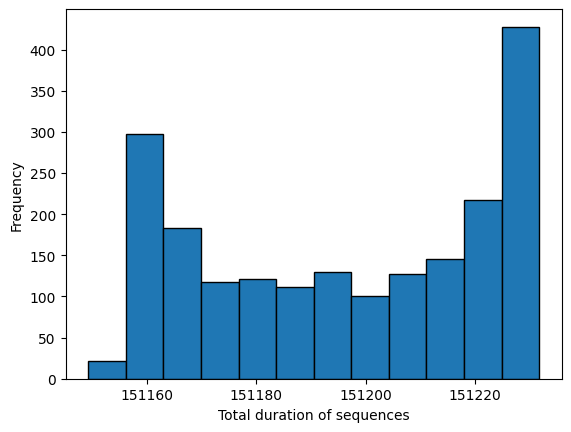

In [30]:
import matplotlib.pyplot as plt
plt.hist(total_length, bins='auto', edgecolor='black')
plt.xlabel('Total duration of sequences')
plt.ylabel('Frequency')
plt.show()

In [31]:
# Seeing how many events in t seconds
t = 6.5
num1 = [0] * 2000
for i in range(2000):
  for j in amazon_data['sequences'][i]['arrival_times']:
    if j < t:
      num1[i] += 1
    else:
      break

t = 6.5/2
num2 = [0] * 2000
for i in range(2000):
  for j in amazon_data['sequences'][i]['arrival_times']:
    if j < t:
      num2[i] += 1
    else:
      break

t = 6.5/3
num3 = [0] * 2000
for i in range(2000):
  for j in amazon_data['sequences'][i]['arrival_times']:
    if j < t:
      num3[i] += 1
    else:
      break

0.0
0.0
0.0


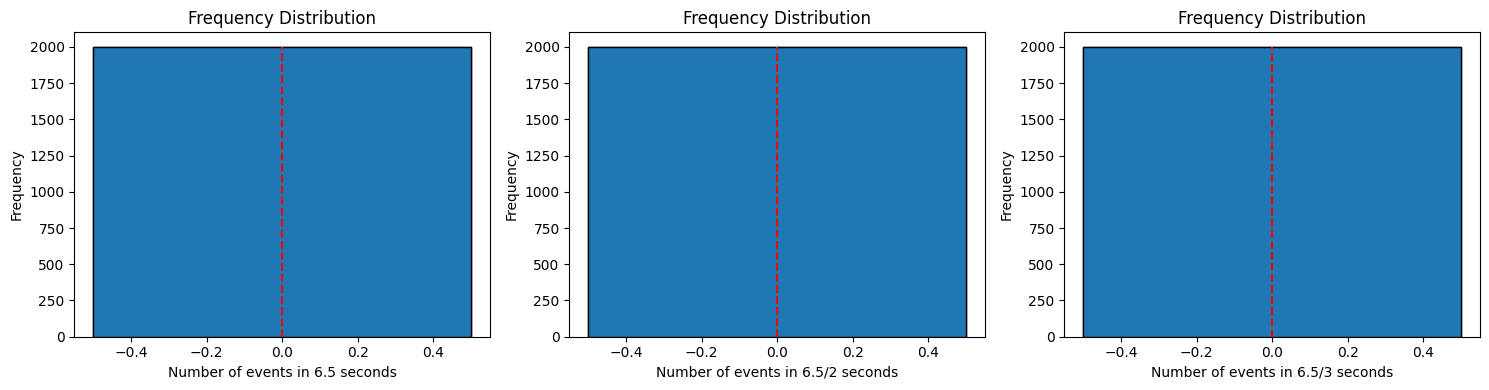

In [34]:
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

xlabels = ['Number of events in 6.5 seconds', 'Number of events in 6.5/2 seconds', 'Number of events in 6.5/3 seconds']

for ax, data, xlabel in zip(axes, [num1, num2, num3], xlabels):

    counts, bins, _ = ax.hist(data, bins='auto', edgecolor='black', color='blue')
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    mean_val = np.mean(data)
    print(mean_val)

    # Find the bin where the mean falls
    bin_index = np.digitize(mean_val, bins) - 1
    bin_index = min(max(bin_index, 0), len(counts) - 1)

    ax.plot([mean_val, mean_val], [0, counts[bin_index]], color='red', linestyle='--')

    ax.hist(data, bins='auto', edgecolor='black')
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Frequency')
    ax.set_title('Frequency Distribution')

plt.tight_layout()
plt.show()

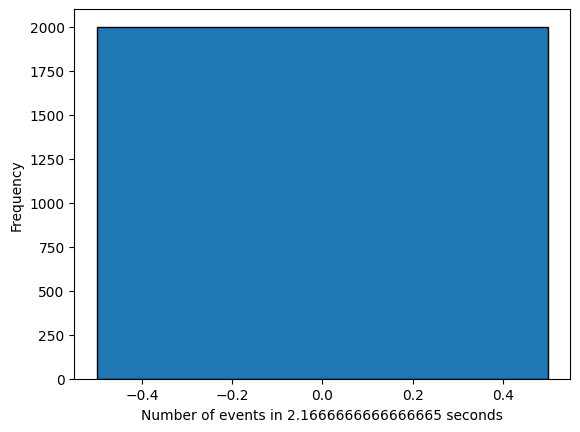

In [32]:
plt.hist(num1, bins='auto', edgecolor='black')
plt.xlabel(f'Number of events in {t} seconds')
plt.ylabel('Frequency')
plt.show()

21.277
9.019166666666667
2.821


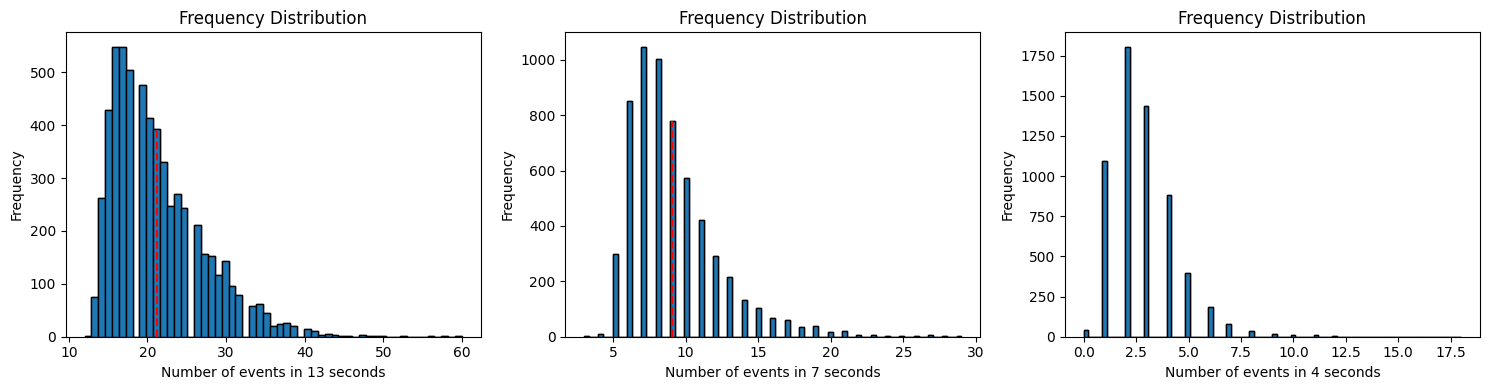

In [ ]:
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

xlabels = ['Number of events in 13 seconds', 'Number of events in 7 seconds', 'Number of events in 4 seconds']

for ax, data, xlabel in zip(axes, [num13, num7, num4], xlabels):

    counts, bins, _ = ax.hist(data, bins='auto', edgecolor='black', color='blue')
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    mean_val = np.mean(data)
    print(mean_val)

    # Find the bin where the mean falls
    bin_index = np.digitize(mean_val, bins) - 1
    bin_index = min(max(bin_index, 0), len(counts) - 1)

    ax.plot([mean_val, mean_val], [0, counts[bin_index]], color='red', linestyle='--')

    ax.hist(data, bins='auto', edgecolor='black')
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Frequency')
    ax.set_title('Frequency Distribution')

plt.tight_layout()
plt.show()